# 案列: 绘制股票行情图
- 不同的时间间隔看待股票数据变化，会有不一样的发现！
- Ｋ线的计算周期分为日Ｋ线，周Ｋ线，月Ｋ线，年Ｋ线
- 最原始的数据只有日Ｋ线，需要通过日的数据来生成月的，周的，年的数据
- K线数据重采样

In [ ]:
- DataFrame.resample(rule, how, axis, fill_method, closed, kind)
- rule 重采样的频率
- how 用于产生聚合值的函数名或数组
- axis 轴
- closed 

In [27]:
import pandas as pd
import numpy as np

In [8]:
stock_day = pd.read_csv('stock_day.csv', usecols=['open', 'low', 'high', 'close'])

In [9]:
stock_day.head()

,open,high,close,low
2018-02-27,23.53,25.88,24.16,23.53
2018-02-26,22.80,23.78,23.53,22.80
2018-02-23,22.88,23.37,22.82,22.71
2018-02-22,22.25,22.76,22.28,22.02
2018-02-14,21.49,21.99,21.92,21.48


In [12]:
# 将索引转换成时间类型
stock_day.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [13]:
pd.to_datetime(stock_day.index)

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [14]:
stock_day.index = pd.to_datetime(stock_day.index)

In [15]:
stock_day.index

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [18]:
# 把周日的价格拿出来
period_week_data = stock_day.resample('W').last()

In [20]:
# 拿去到开盘价格
period_week_data['open'] = stock_day.resample('W').first()

In [21]:
# 最高价
period_week_data['high'] = stock_day.resample('W').max()

In [23]:
period_week_data['low'] = stock_day.resample('W').min()

In [24]:
period_week_data.head()

,open,high,close,low
2015-03-08,12.25,13.17,14.28,12.25
2015-03-15,14.14,14.80,14.47,14.11
2015-03-22,14.52,15.38,15.34,14.52
2015-03-29,15.34,15.97,15.77,14.90
2015-04-05,15.99,16.78,16.66,15.99


In [34]:
# 处理缺失值
for index in period_week_data.index:
    if np.any(period_week_data.loc[index].isnull()):
        period_week_data.drop(index, inplace=True)

In [38]:
from mpl_finance import candlestick_ochl
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num

In [41]:
stock_day.values

array([[23.53, 25.88, 24.16, 23.53],
       [22.8 , 23.78, 23.53, 22.8 ],
       [22.88, 23.37, 22.82, 22.71],
       ...,
       [12.8 , 12.92, 12.9 , 12.61],
       [12.52, 13.06, 12.7 , 12.52],
       [12.25, 12.67, 12.52, 12.2 ]])

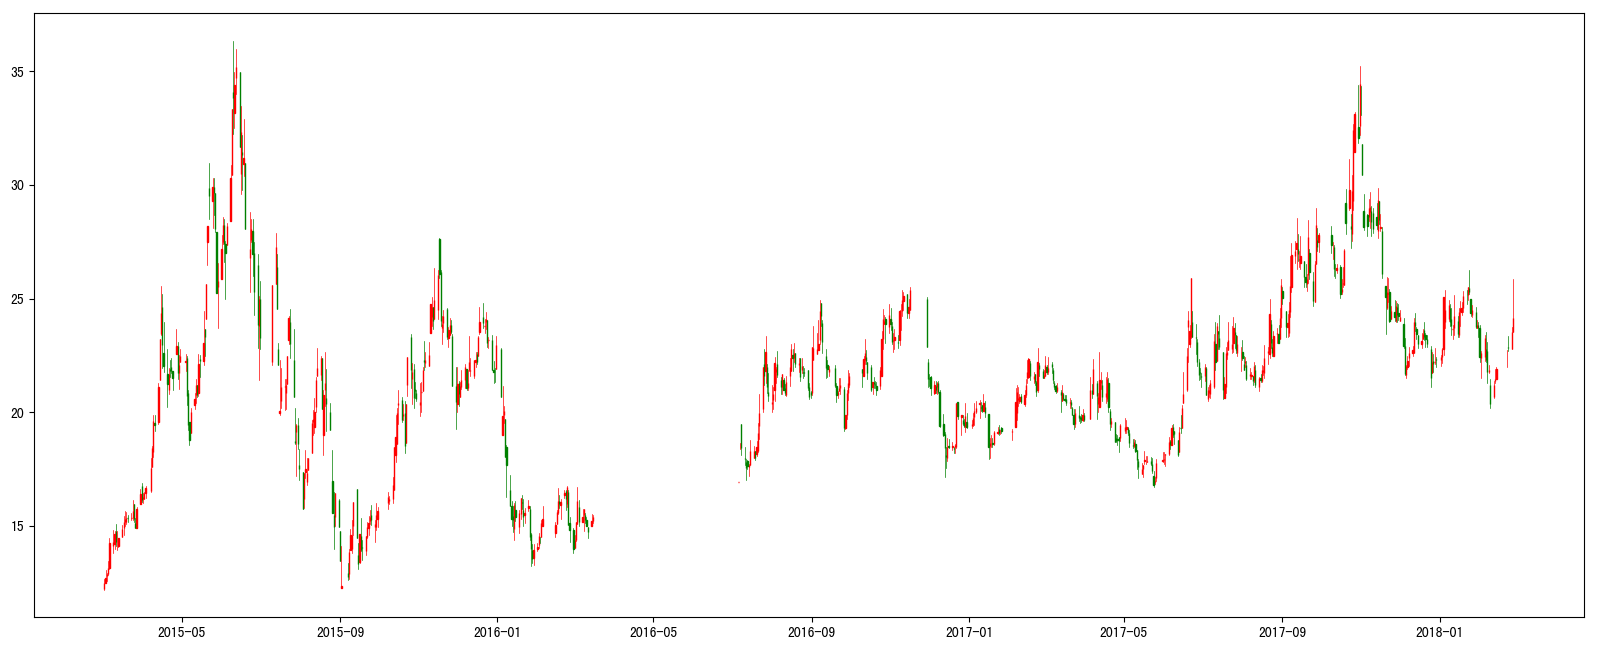

In [64]:
fig, axes = plt.subplots(figsize=(20, 8), dpi=100)
stock_day['date'] = date2num(stock_day.index)
day_k = stock_day[['date', 'open', 'close', 'high', 'low']]
candlestick_ochl(axes, day_k.values, colorup='r', colordown='g')
axes.xaxis_date()
plt.show()

In [45]:
stock_day[['date', 'open', 'close', 'high', 'low']].head()

,date,open,close,high,low
2018-02-27,736752.0,23.53,24.16,25.88,23.53
2018-02-26,736751.0,22.80,23.53,23.78,22.80
2018-02-23,736748.0,22.88,22.82,23.37,22.71
2018-02-22,736747.0,22.25,22.28,22.76,22.02
2018-02-14,736739.0,21.49,21.92,21.99,21.48


In [61]:
stock_day.values

array([[2.35300e+01, 2.58800e+01, 2.41600e+01, 2.35300e+01, 7.36752e+05],
       [2.28000e+01, 2.37800e+01, 2.35300e+01, 2.28000e+01, 7.36751e+05],
       [2.28800e+01, 2.33700e+01, 2.28200e+01, 2.27100e+01, 7.36748e+05],
       ...,
       [1.28000e+01, 1.29200e+01, 1.29000e+01, 1.26100e+01, 7.35661e+05],
       [1.25200e+01, 1.30600e+01, 1.27000e+01, 1.25200e+01, 7.35660e+05],
       [1.22500e+01, 1.26700e+01, 1.25200e+01, 1.22000e+01, 7.35659e+05]])

In [62]:
day_k.values

array([[7.36752e+05, 2.35300e+01, 2.41600e+01, 2.58800e+01, 2.35300e+01],
       [7.36751e+05, 2.28000e+01, 2.35300e+01, 2.37800e+01, 2.28000e+01],
       [7.36748e+05, 2.28800e+01, 2.28200e+01, 2.33700e+01, 2.27100e+01],
       ...,
       [7.35661e+05, 1.28000e+01, 1.29000e+01, 1.29200e+01, 1.26100e+01],
       [7.35660e+05, 1.25200e+01, 1.27000e+01, 1.30600e+01, 1.25200e+01],
       [7.35659e+05, 1.22500e+01, 1.25200e+01, 1.26700e+01, 1.22000e+01]])

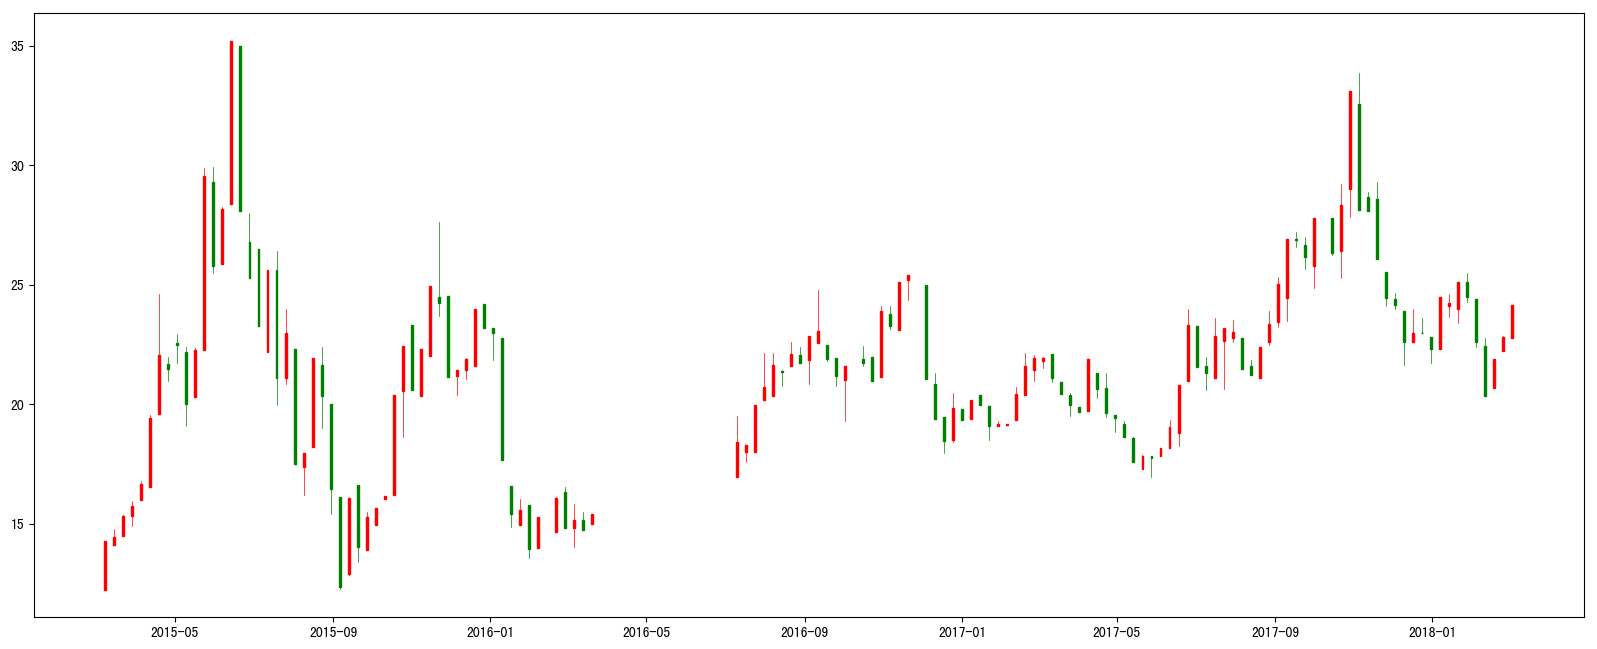

In [71]:
fig, axes = plt.subplots(figsize=(20, 8), dpi=100)
period_week_data['date'] = date2num(period_week_data.index)
week_k = period_week_data[['date', 'open', 'close', 'high', 'low']]

candlestick_ochl(axes, week_k.values, width=1.5, colorup='r', colordown='g')
# x刻度设置为日期
axes.xaxis_date()
plt.show()

In [73]:
candlestick_ochl?